In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
train=pd.read_csv('train_titanic.csv')
test=pd.read_csv('tes_titanict.csv')

In [6]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [7]:
actual=pd.read_csv('gender_submission.csv')

In [8]:
train.drop(['PassengerId','Name','Cabin','Embarked','Fare'],axis=1,inplace=True)

In [9]:
train['Sex']=LE.fit_transform(train['Sex'])

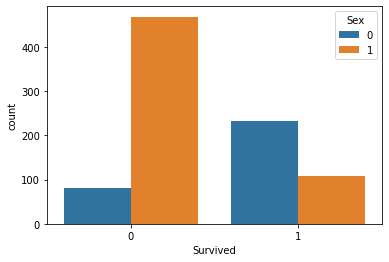

In [10]:
sns.countplot(train['Survived'],hue=train['Sex'])

In [11]:
train.drop(['Ticket'],axis=1,inplace=True)
train.drop(['Age'],axis=1,inplace=True)

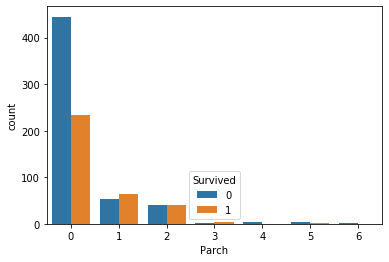

In [12]:
sns.countplot(train['Parch'],hue=train['Survived'])

In [13]:
test['Sex']=LE.fit_transform(test['Sex'])

In [15]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
X =train[['Pclass', 'Sex', 'SibSp', 'Parch']]
Y =train['Survived']
test_features=test[['Pclass', 'Sex', 'SibSp', 'Parch']]
to_predict=actual['Survived']

In [18]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [19]:
xgb.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
pred=xgb.predict(test_features)

In [21]:
print('Accuracy sore of Decision Tree Classifier:',accuracy_score(to_predict,pred,normalize=True)*100)

Accuracy sore of Decision Tree Classifier: 95.45454545454545
